# Part 1: The Rail Environment


In this notebook, we will see how to create, interact with and render our first railway systems.

# In a nutshell

In [ ]:
# Install Flatland
!git clone https://gitlab.aicrowd.com/flatland/flatland.git/ --branch 223_UpdateEditor_55_notebooks
%cd flatland
!pip install -e .
!pip install imageio

In [1]:
import numpy as np

from flatland.envs.rail_env import RailEnv
from flatland.envs.rail_generators import rail_from_manual_specifications_generator

In [2]:
# Create a fixed railway from a 2D array of (tile type, rotation) tuples
specs = [[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)],
         [(0, 0), (0, 0), (0, 0), (0, 0), (7, 0), (0, 0)],
         [(7, 270), (1, 90), (1, 90), (1, 90), (2, 90), (7, 90)],
         [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]]

rail_shape = np.array(specs).shape

fixed_env = RailEnv(width=rail_shape[1],
              height=rail_shape[0],
              rail_generator=rail_from_manual_specifications_generator(specs),
              number_of_agents=1
              )

# Call reset() to initialize the env
observation = fixed_env.reset()

In [3]:
# We will study observations in details in the next notebook.

# As a first approach: by default, for each agent, the observation contains 3 arrays
agent_handle = 0
print('Agent {} observations:'.format(agent_handle))
agent_obs = observation[0][agent_handle]

print('Transition map')
print(agent_obs[0])
print()

print('State of all agents in the environment')
print(agent_obs[1])
print()

print('Position and targets of all the agents')
print(agent_obs[2])
print()

# Additional information from the observation
print('Additional information')
print(observation[1])

Agent 0 observations:
Transition map
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 

In [4]:
from flatland.envs.rail_env import RailEnvActions

# Calling step() returns dictionaries
next_obs, all_rewards, done, _ = fixed_env.step({agent_handle: RailEnvActions.MOVE_FORWARD})

print('Rewards for each agent:')
print(all_rewards)

print('Done for each agent:')
print(done)

Rewards for each agent:
{0: -1.0}
Done for each agent:
{0: False, '__all__': False}


/home/alessandro/.conda/envs/flatland/lib/python3.8/site-packages/flatland/utils/rendertools.py:290: UserWarning: Predictor did not provide any predicted cells to render.                 Observation builder needs to populate: env.dev_obs_dict
  warnings.warn(


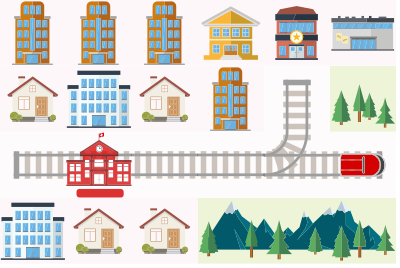

In [5]:
import PIL
from flatland.utils.rendertools import RenderTool

# Render the environment
def render_env(env):
    env_renderer = RenderTool(env, gl="PILSVG")
    env_renderer.render_env()

    image = env_renderer.get_image()
    pil_image = PIL.Image.fromarray(image)
    display(pil_image)

render_env(fixed_env)

In [6]:
from flatland.envs.rail_generators import random_rail_generator

# Random rail networks can be built from a list of probability per cell type
transition_probability = [1.0,  # empty cell - Case 0
                          1.0,  # Case 1 - straight
                          1.0,  # Case 2 - simple switch
                          0.3,  # Case 3 - diamond drossing
                          0.5,  # Case 4 - single slip
                          0.5,  # Case 5 - double slip
                          0.2,  # Case 6 - symmetrical
                          0.0,  # Case 7 - dead end
                          0.2,  # Case 8 - turn left
                          0.2,  # Case 9 - turn right
                          1.0]  # Case 10 - mirrored switch

random_env = RailEnv(width=15,
              height=15,
              rail_generator=random_rail_generator(
                        cell_type_relative_proportion=transition_probability
                        ),
              number_of_agents=1)

random_env.reset();

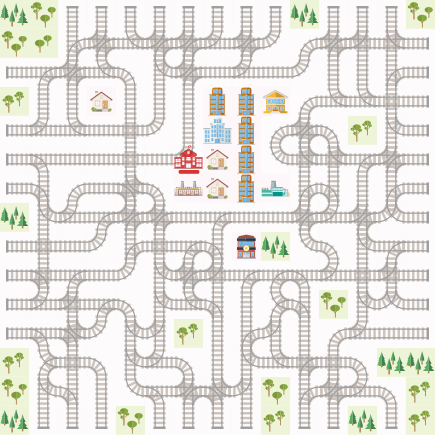

In [7]:
render_env(random_env)

In [8]:
# Let's create and "train" a random agent
class RandomAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size

    def act(self, state):
        return np.random.choice(np.arange(self.action_size))

    def step(self, memories):
        # This is where the agent would learn
        return

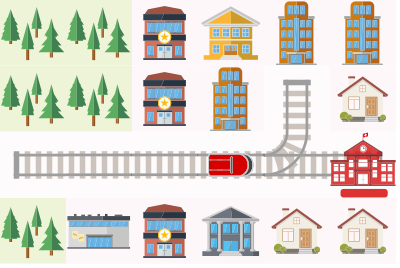

Step 9: agent 0 takes action R
Total return = -8.0
All done!
Didn't finish episode after 50 steps


In [9]:
from IPython.display import clear_output

MAX_STEPS = 50

def run_episode(env):
    agent = RandomAgent(218, 4)
    obs, info = env.reset()

    score = 0
    action_dict = dict()

    for step in range(MAX_STEPS):
        clear_output(wait=True)
        render_env(env)
        
        for agent_handle in range(env.get_num_agents()):
            action = agent.act(obs[agent_handle])
            action_dict.update({agent_handle: action})
            print('Step {}: agent {} takes action {}'.format(step, agent_handle, RailEnvActions.to_char(action)))

        next_obs, all_rewards, done, _ = env.step(action_dict)

        for a in range(env.get_num_agents()):
            agent.step((obs[a], action_dict[a], all_rewards[a], next_obs[a], done[a]))
            score += all_rewards[a]

        print('Total return = {}'.format(score))
        
        if done['__all__']:
            print('All done!')
            break
            
    print('Didn\'t finish episode after {} steps'.format(MAX_STEPS))

# Run an episode in the fixed environment
run_episode(fixed_env)

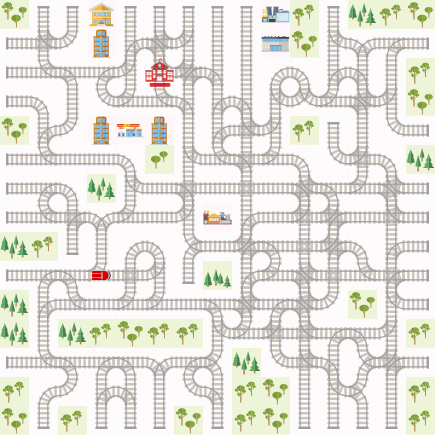

Step 49: agent 0 takes action B
Total return = -50.0
Didn't finish episode after 50 steps


In [10]:
# This one will take longer!
run_episode(random_env)

**That's it!** You've created and rendered your first rail environments, and ran a random agent in it.

# In more details...

Let's dive into more details about some points mentioned above.

The basic usage of `RailEnv` environments consists in creating a RailEnv object endowed with a **rail generator**, that generates new rail networks on each reset, and an **observation generator**, that provides a suitable observation vector to the agents. 

Fixed rail network
---

There are multiple ways to generate a rail network. The simpler one is to describe it explicitely, as such:

In [ ]:
specs = [[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)],
         [(0, 0), (0, 0), (0, 0), (0, 0), (7, 0), (0, 0)],
         [(7, 270), (1, 90), (1, 90), (1, 90), (2, 90), (7, 90)],
         [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]]

`specs` is a 2-dimensional array of tuples:

In [ ]:
import numpy as np

rail_shape = np.array(specs).shape
rail_shape

The `specs` array represent a 4 by 6 2D grid of tuples. In each tuple, the first element represent the **cell type**, and the second the **rotation** of the cell (0, 90, 180 or 270 degrees clockwise).

The following image gives an overview of the eight basic types. These can be rotated in steps of 45° and mirrored along the North-South of East-West axis.

![cell types](assets/transitions.png)


Here's the list of transitions as defined in flatland.core.grid.rail_env_grid.RailEnvTransitions

```
transition_list = [int('0000000000000000', 2),  # empty cell - Case 0
                   int('1000000000100000', 2),  # Case 1 - straight
                   int('1001001000100000', 2),  # Case 2 - simple switch
                   int('1000010000100001', 2),  # Case 3 - diamond drossing
                   int('1001011000100001', 2),  # Case 4 - single slip
                   int('1100110000110011', 2),  # Case 5 - double slip
                   int('0101001000000010', 2),  # Case 6 - symmetrical
                   int('0010000000000000', 2),  # Case 7 - dead end
                   int('0100000000000010', 2),  # Case 1b (8)  - simple turn right
                   int('0001001000000000', 2),  # Case 1c (9)  - simple turn left
                   int('1100000000100010', 2)]  # Case 2b (10) - simple switch mirrored
```

`RailEnv` accepts a `rail_generator` parameter, which is used to generate the rail networks. When creating fixed networks, we use `rail_from_manual_specifications_generator`.

In [ ]:
env = RailEnv(width=rail_shape[1],
              height=rail_shape[0],
              rail_generator=rail_from_manual_specifications_generator(specs),
              number_of_agents=1
              )

A call to `reset()` is necessary to fully initialize the environment. As usual with gym-like environment, this returns the initial observation as a results.

In [ ]:
observation = env.reset()

As we have seen above, the environment provides very complete observations by default. You typically won't use this object as-is. One of the main objectives of the Flatland challenge is to **find suitable observations** to solve the task at hand. We will see how this works in the next notebook.

Running an agent
--

`RailEnv` is a gym environment. However, as opposed to most environments, it is targeted at multi-agents experiments. For this purpose, it is derived from RLLib's `MultiAgentEnv` ([more details about it here](https://ray.readthedocs.io/en/latest/rllib-env.html)).

The environment can be run by supplying the environment step function with a **dictionary** of actions, whose keys are agents’ handles and the corresponding values are the selected actions:

In [ ]:
obs = env.reset()
agent = RandomAgent(218, 4)
action_dict = dict()

for handle in env.get_agent_handles():
    action = agent.act(obs[handle])
    action_dict.update({handle: action})
    
for (handle, action) in action_dict.items():
    print('Agent {} will perform action {} ({})'.format(handle, action, RailEnvActions.to_char(action)))

In the example above, we use `env.get_agent_handles()` to enumarate through the handles, and `RailEnvActions.to_char` to get a symbol representing the agent's direction (**B**ackward, **F**orward, **L**eft, **R**ight, **S**top): 